In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report , accuracy_score




In [2]:
df=pd.read_csv('/content/drive/MyDrive/dataset/Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
df.shape

(2200, 8)

In [4]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [5]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

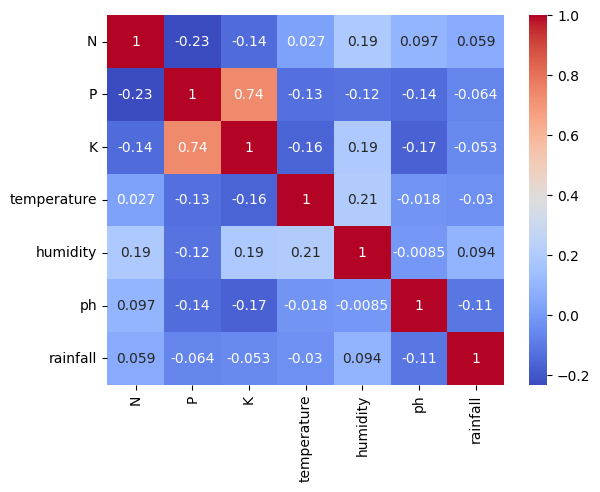

In [8]:
sns.heatmap(df.corr(),annot=True,cbar=True, cmap='coolwarm', fmt='.2g')

In [9]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [10]:
le=LabelEncoder()

df['label']=le.fit_transform(df['label'])
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [11]:
df['label'].value_counts()

20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: label, dtype: int64

In [12]:
X=df.iloc[:,:-1]
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [13]:
y=df.iloc[:,-1]
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int64

In [14]:
scaler=MinMaxScaler()

X=scaler.fit_transform(X)
X

array([[0.64285714, 0.26428571, 0.19      , ..., 0.79026683, 0.46626364,
        0.65645778],
       [0.60714286, 0.37857143, 0.18      , ..., 0.77063285, 0.54948026,
        0.74167459],
       [0.42857143, 0.35714286, 0.195     , ..., 0.79397664, 0.67421877,
        0.87571039],
       ...,
       [0.84285714, 0.2       , 0.125     , ..., 0.61788046, 0.44443315,
        0.55007079],
       [0.83571429, 0.19285714, 0.145     , ..., 0.44175991, 0.50604494,
        0.38428046],
       [0.74285714, 0.09285714, 0.125     , ..., 0.53822177, 0.50931694,
        0.43372112]])

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


In [16]:

lr=LogisticRegression()
nb=GaussianNB()
svc=SVC()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier(random_state=1)
rf=RandomForestClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
accuracy=[]

models=[lr,nb,svc,knn,dt,rf,gb]

for model in models:
  print('**********',model,'**********')
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print('accuracy:',accuracy_score(y_test,y_pred)*100)
  accuracy.append(accuracy_score(y_test,y_pred)*100)

********** LogisticRegression() **********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        28
           2       0.76      0.90      0.83        29
           3       1.00      1.00      1.00        28
           4       0.96      1.00      0.98        25
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        44
           8       0.95      0.59      0.73        32
           9       0.94      0.97      0.96        33
          10       0.89      0.93      0.91        27
          11       1.00      1.00      1.00        28
          12       0.82      1.00      0.90        32
          13       1.00      0.67      0.80        33
          14       0.92      1.00      0.96        33
          15       1.00      1.00      1.00        36
          16       1.00      0.91     

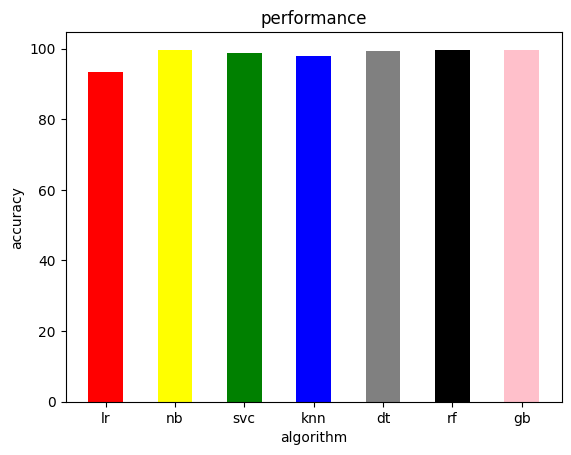

In [17]:
x=['lr','nb','svc','knn','dt','rf','gb']
y=accuracy
plt.bar(x,y,color=['red','yellow','green','blue','grey','black','pink'],width=0.5)
plt.xlabel('algorithm')
plt.ylabel('accuracy')
plt.title('performance')
plt.show()


In [18]:
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False] }

In [19]:
clf=RandomizedSearchCV(rf,params)
clf.fit(X_train,y_train)
print(clf.best_estimator_)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=1)


In [20]:
rf1=RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=1)
rf1.fit(X_train,y_train)
y_pred1=rf1.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        44
           8       0.94      1.00      0.97        32
           9       1.00      1.00      1.00        33
          10       1.00      1.00      1.00        27
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        33
          14       1.00      1.00      1.00        33
          15       1.00      1.00      1.00        36
          16       1.00      1.00      1.00        23
          17       1.00    

In [21]:
y_new=rf.predict(scaler.transform([[85	,58	,41	,21.770462	,80.319644,	7.038096	,226.655537]]))
y_new
result=le.inverse_transform([y_new])
print(result)

['rice']


In [22]:
import pickle

filename='crop_prediction.pkl'
pickle.dump(rf1,open(filename,'wb'))
pickle.dump(scaler,open('mscaler.pkl','wb'))


In [23]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00


In [29]:
!wget -q -O - - ipv4.icanhazip.com

34.74.72.50


In [ ]:
!streamlit run crop_app.py & npx localtunnel --port 8501





  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.74.72.50:8501

npx: installed 22 in 2.082s
your url is: https://thick-eagles-bake.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not h